In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def extracao(filename):
    Vet = []
    image = cv2.imread(filename)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray,(5,5),0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 135, 15)
    thresh = cv2.resize(thresh, dsize = (1520,2280), interpolation=cv2.INTER_AREA)
    
    for i in range(15):
        for k in range(10):
            
            crop_img = (thresh[12+i*152:(i+1)*152-12, 12+k*152:(k+1)*152-12])
            
            # identifica contornos na imagem
            kernel = np.ones((5, 5),np.uint8)
            bcrop_img = cv2.erode(crop_img, kernel, iterations = 1)
            contours, hierarchy = cv2.findContours(bcrop_img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            
            area = np.zeros(len(contours))
            for i, ctr in enumerate(contours):
                x, y, w, h = cv2.boundingRect(ctr)
                area[i] = w*h
            if len(area) > 1:
                bigarea = np.amax(area[0:-1])
            else:
                bigarea = np.amax(area[0])
            
            for i, ctr in enumerate(contours):
                x, y, w, h = cv2.boundingRect(ctr)
                if bigarea == area[i]:
                    crop_img = crop_img[y:y+h,x:x+w]
            
            #cv2.imshow('img', crop_img)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()

            m, n = (np.size(crop_img,0),np.size(crop_img,1))
            if m > n:
                M = 255*np.ones((int(m+0.36*m), int(m + 0.36*m)))#, dtype = np.int8)
                M[int(0.18*m + 1): int(0.18*m + m) + 1, int((0.18*m + 0.5*m - 0.5*n) + 1): int((0.18*m + 0.5*m - 0.5*n) + n) + 1] = crop_img
            else:
                M = 255*np.ones((int(n+0.36*n), int(n + 0.36*n)))#, dtype = np.int8)
                M[int(0.18*n + 1): int(0.18*n + m) + 1, int((0.18*n + 0.5*m - 0.5*n) + 1): int((0.18*n + 0.5*m - 0.5*n) + n) + 1] = crop_img

            crop_img = cv2.resize(M,dsize=(28,28),interpolation=cv2.INTER_AREA)
            #cv2.imshow('img', crop_img)
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()
            
            # padrao de entrada para o classificador
            crop_img = np.reshape(crop_img, (784,))
            Vet.append(crop_img)
    return(Vet)

Vet = []
Target = []

for i in range(15):
    for k in range(15):
        for j in range(10):
            Target.append(j)
    Vet = Vet + extracao('folha%i.png'%(i+1))
np.save('Num.npy',Vet)
np.save('Target.npy',Target)

Folha 1


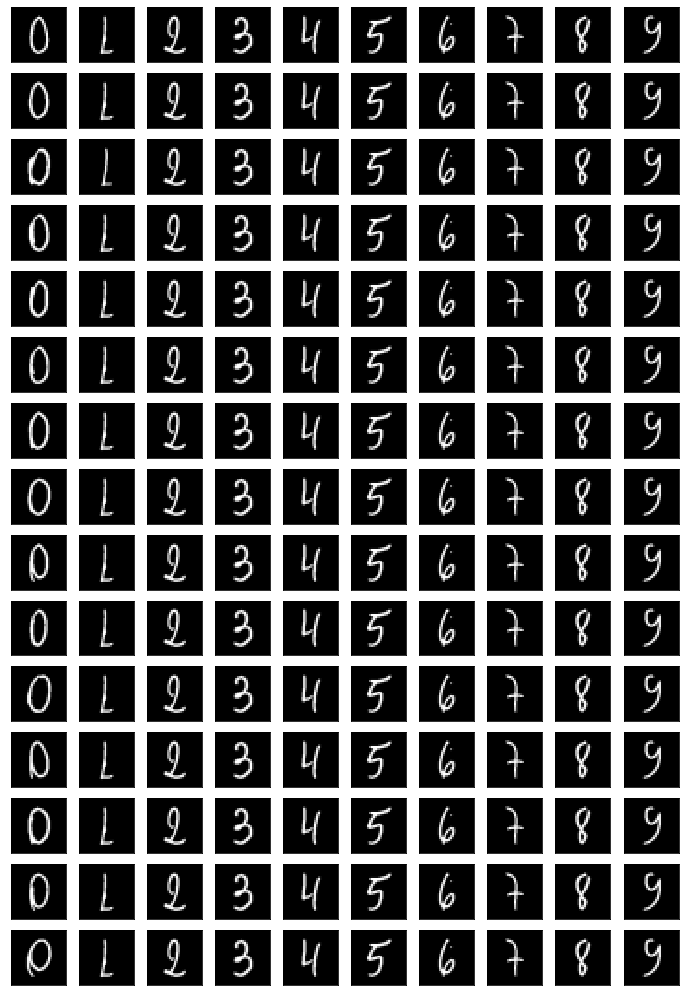

Folha 2


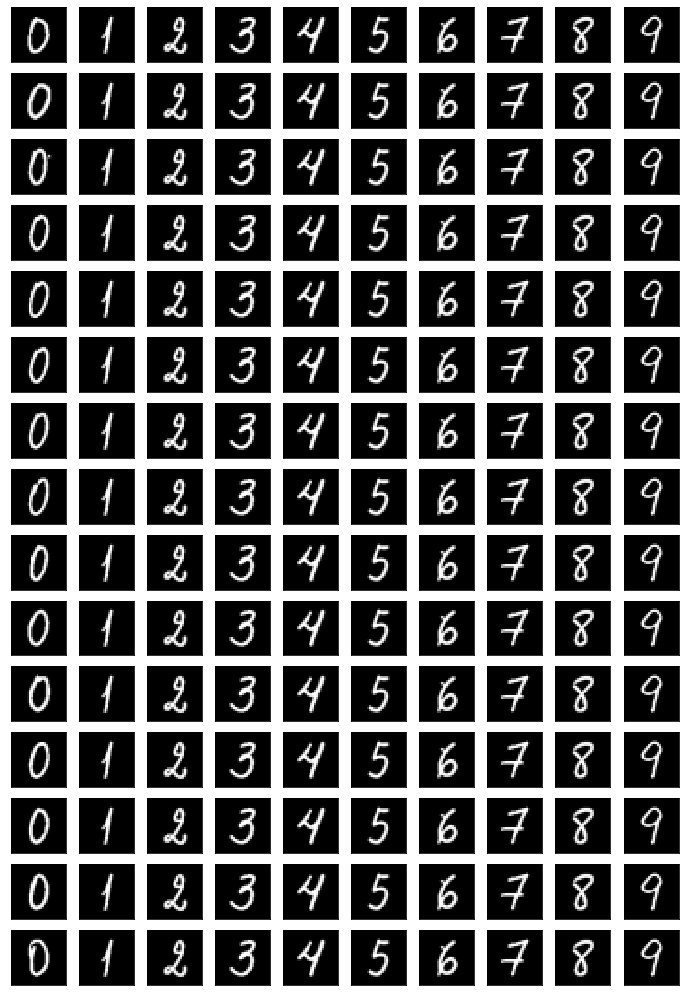

Folha 3


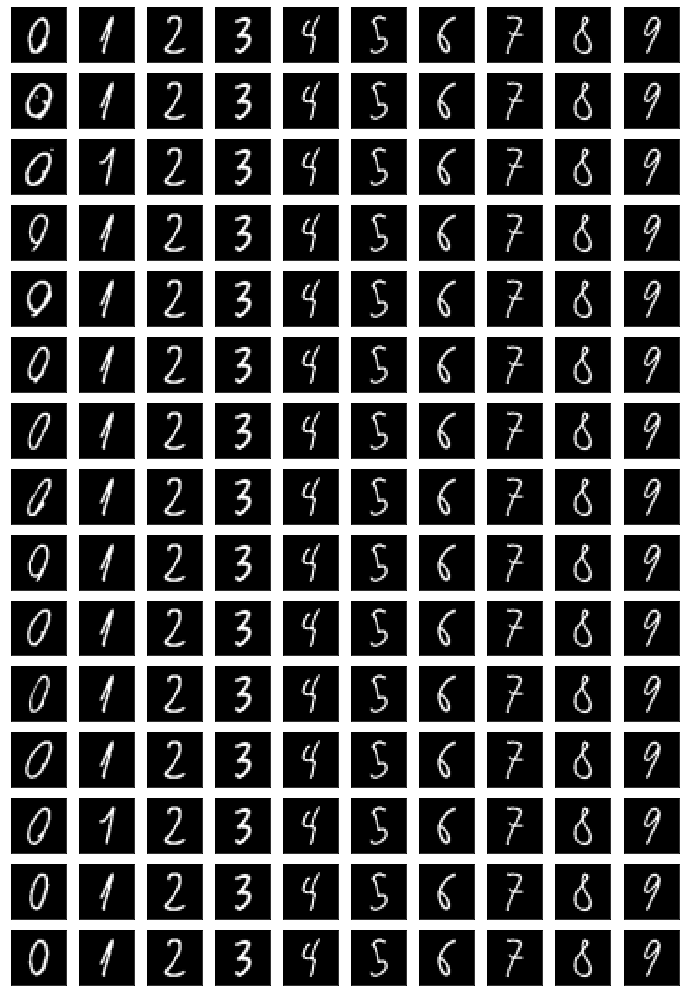

Folha 4


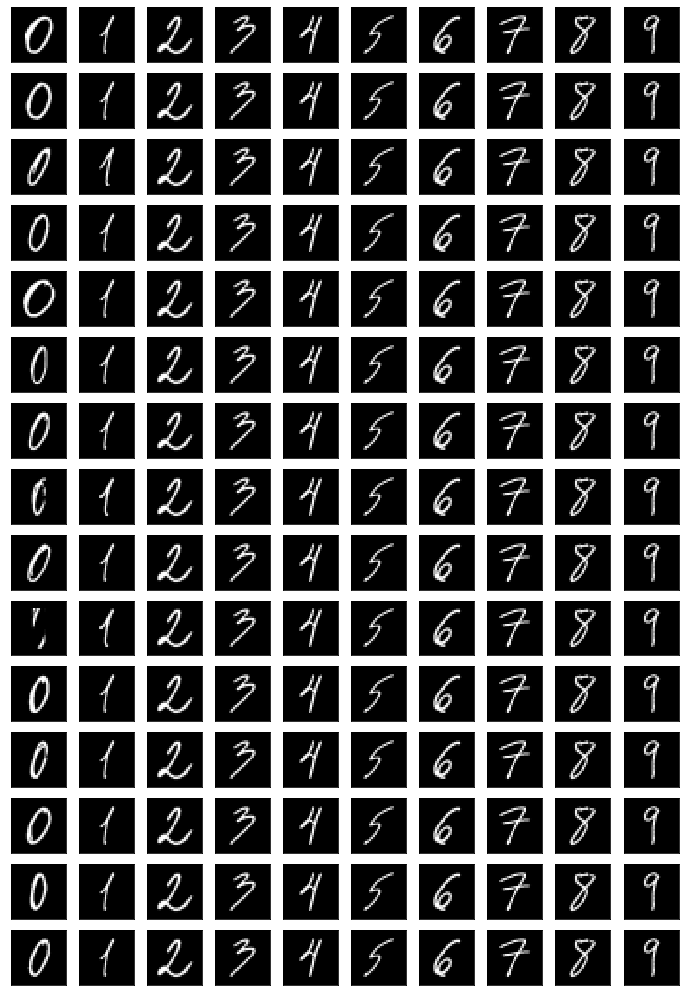

Folha 5


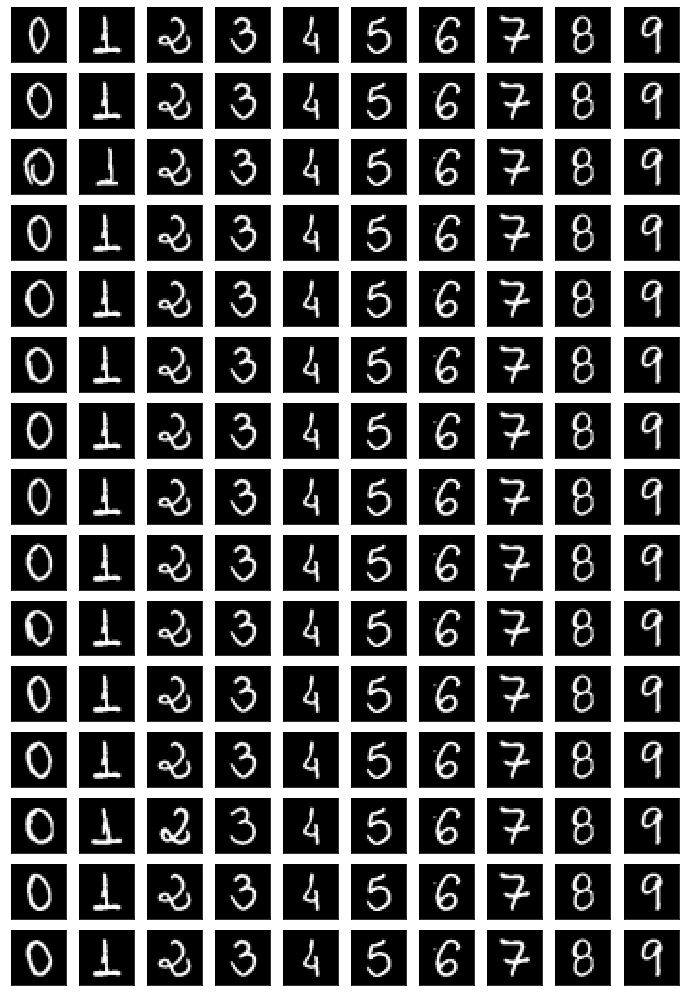

Folha 6


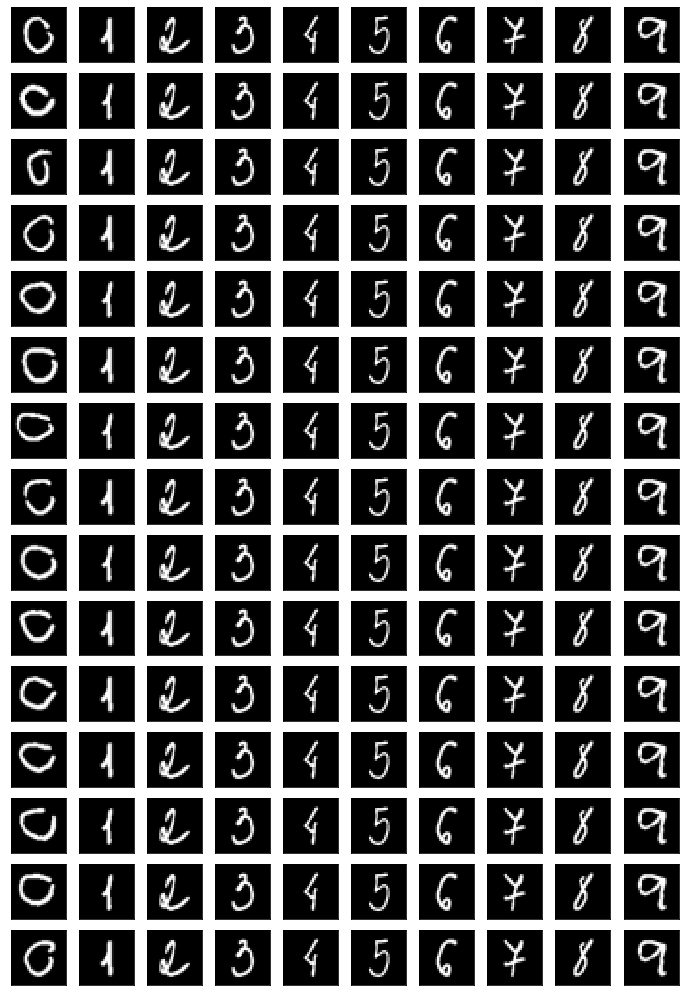

Folha 7


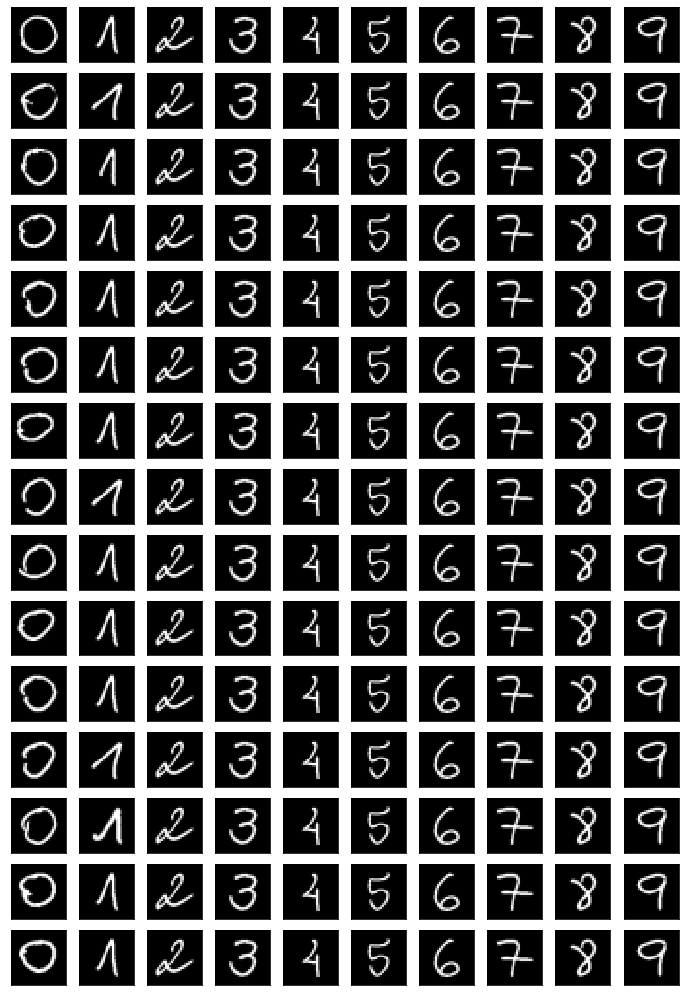

Folha 8


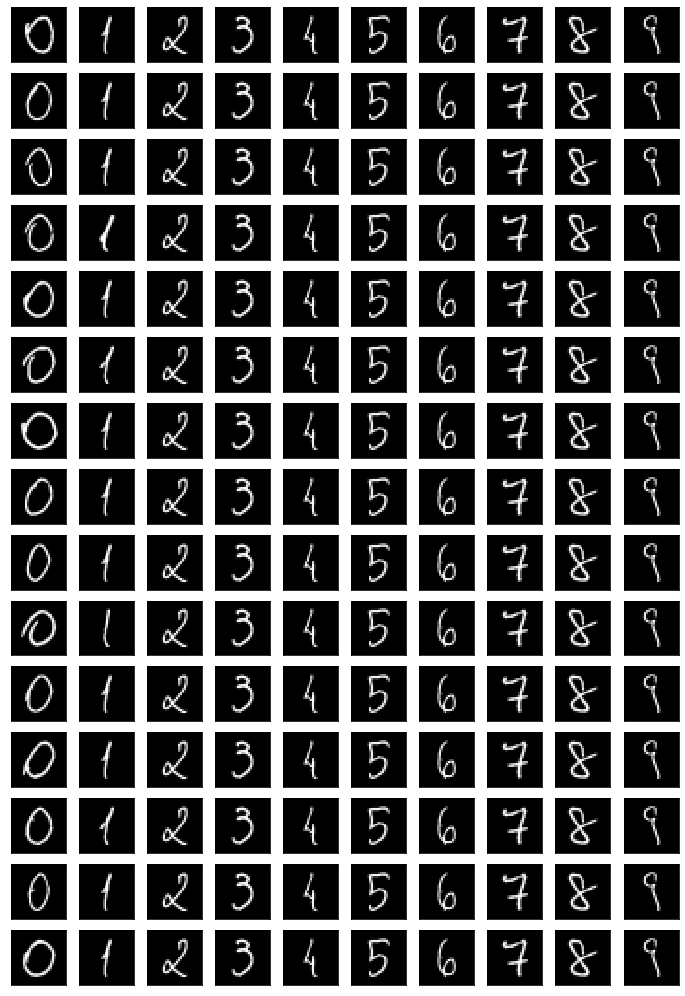

Folha 9


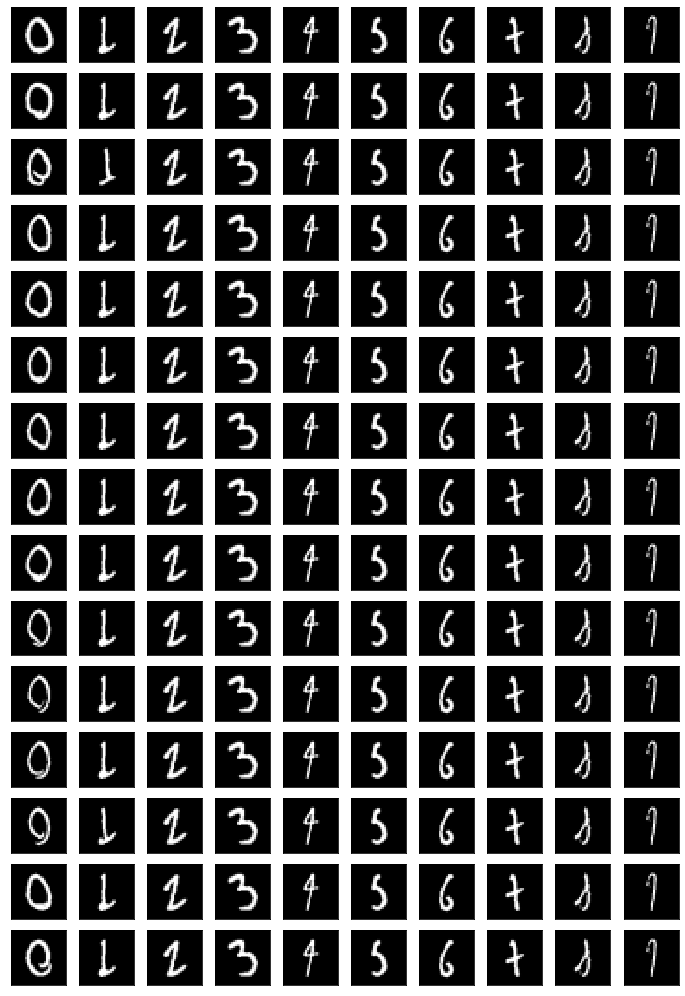

Folha 10


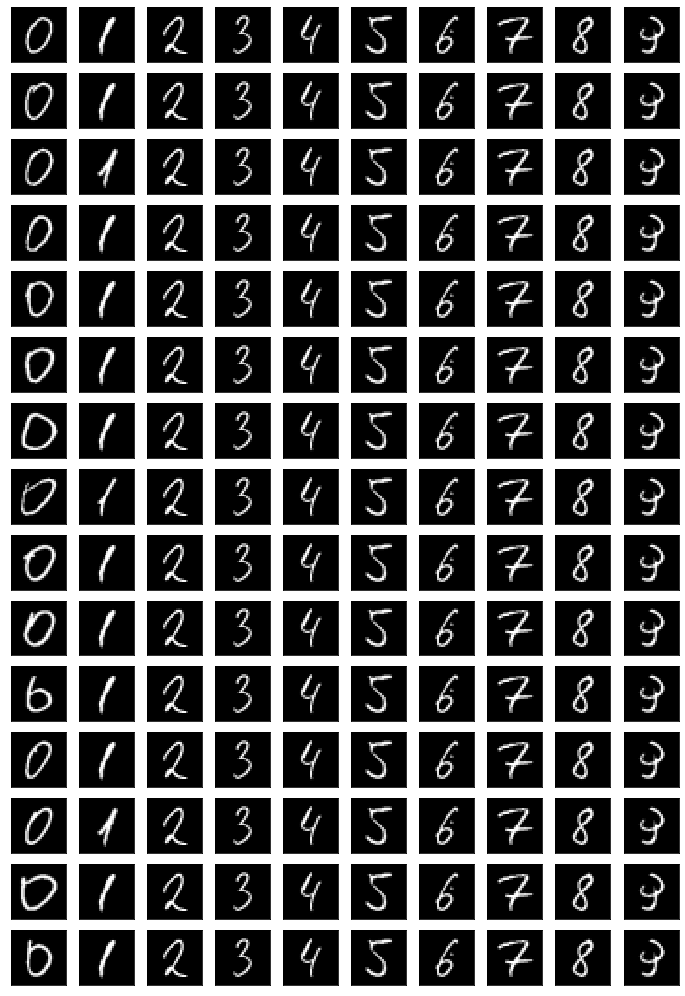

Folha 11


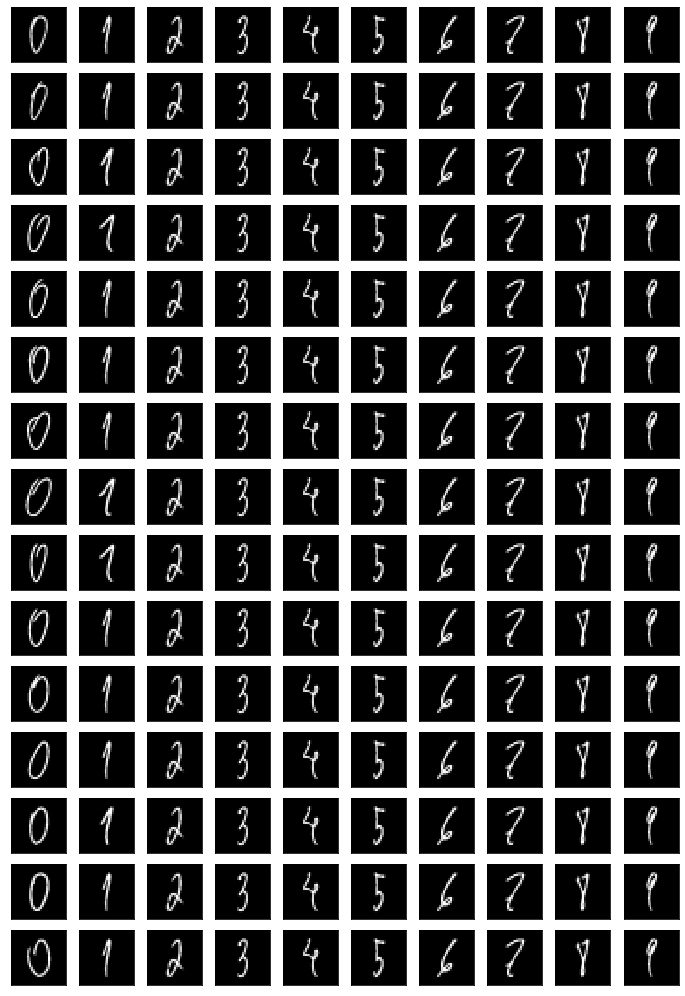

Folha 12


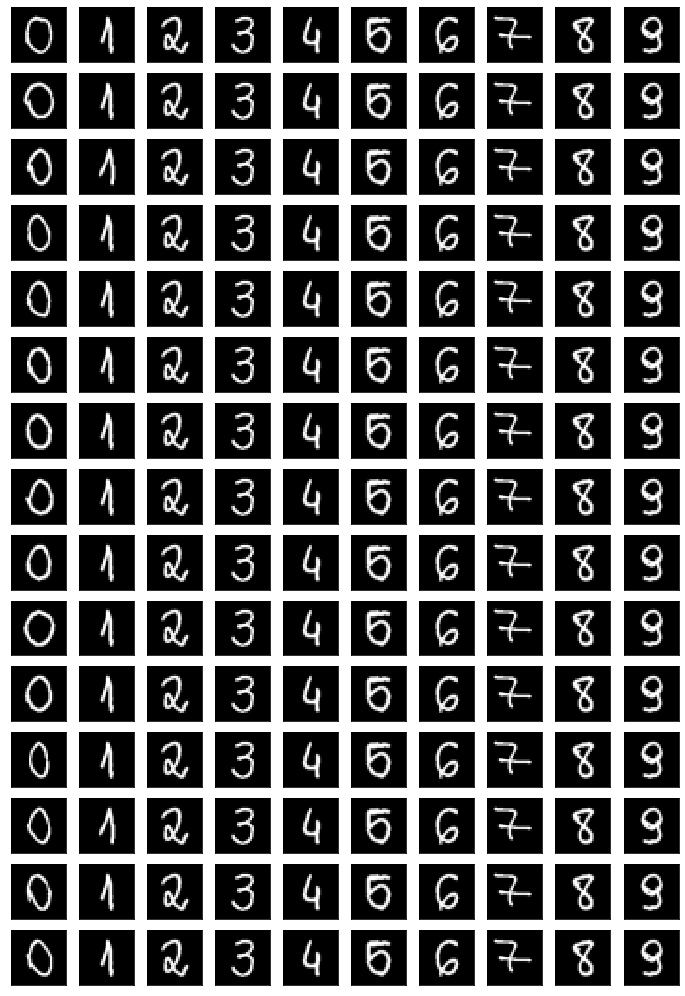

Folha 13


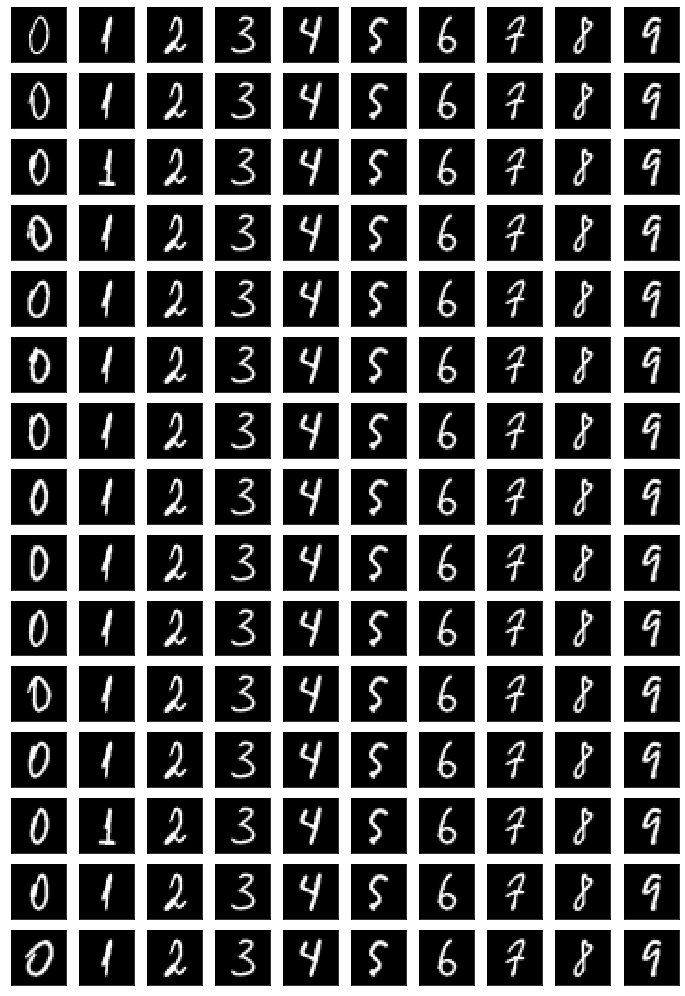

Folha 14


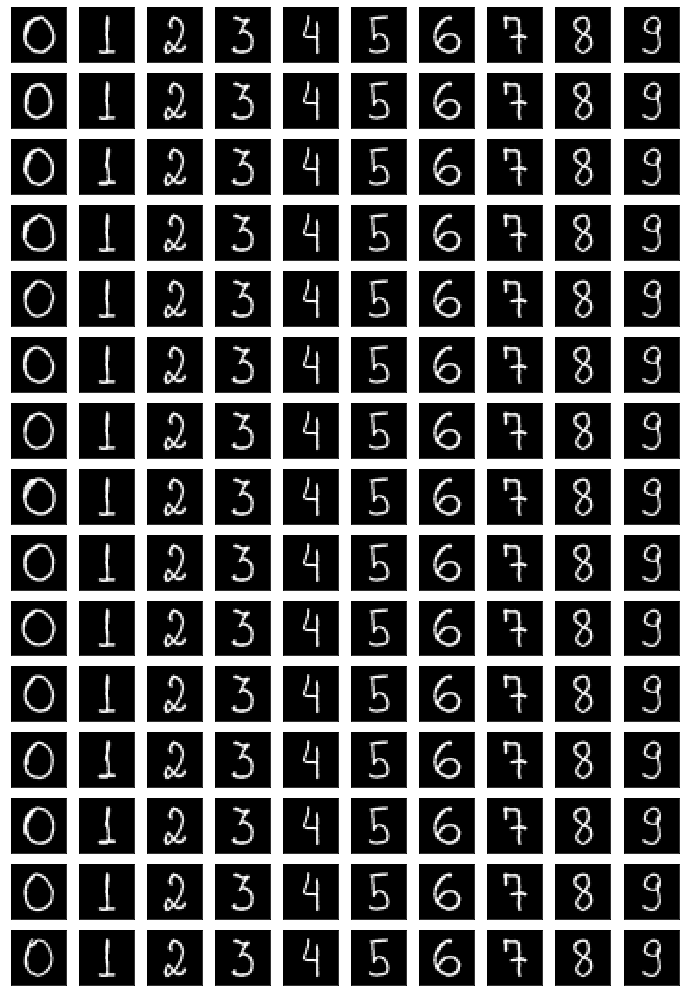

Folha 15


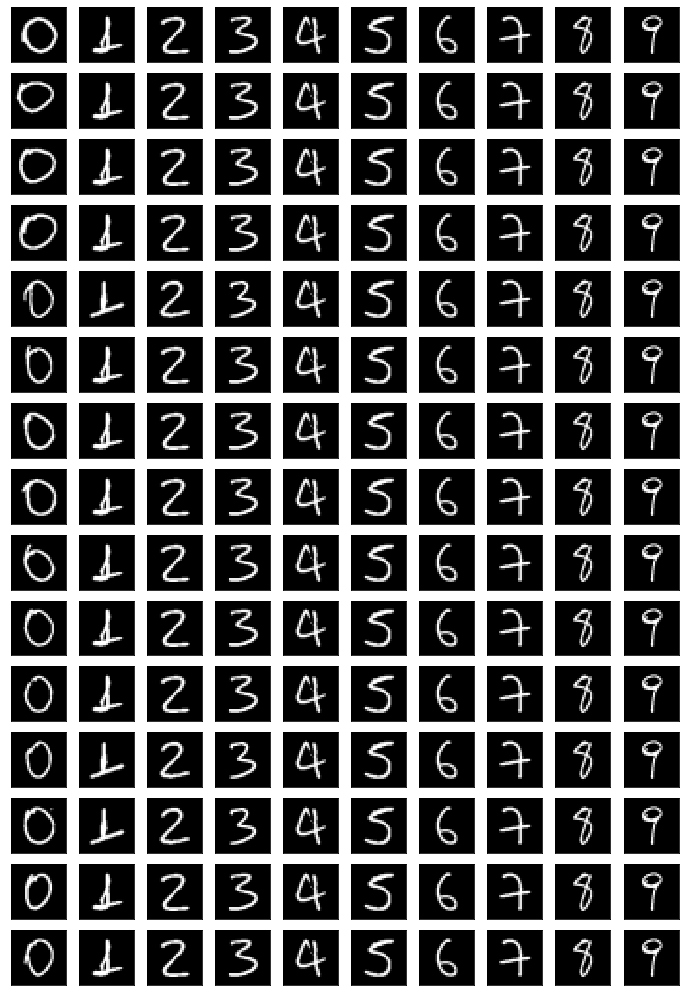

In [3]:
# plota todos os dígitos
showme = True
if showme:
    for folhan in range(15):
        fig = plt.figure(figsize = [12,18])
        for j, i in enumerate(range(150*folhan,150*(folhan+1))):
            plt.subplot(15, 10, j+1, xticks = [], yticks = [])
            plt.imshow(np.reshape(Vet[i], (28,28)), cmap=plt.cm.gray_r)
        print('Folha '+str(folhan+1))
        plt.show()